In [162]:
# импорт нужных библиотек и данных
import pandas as pd
df = pd.read_csv('crypto-markets.csv')

In [163]:
# первичная очистка и приведение типа данных даты
del df['slug']
del df['symbol']
del df['close_ratio']
df['date']= pd.to_datetime(df['date'])
# будем рассматривать среднюю цену валюты за день
df['mean_cost'] = (df['open'] + df['close'] + df['high'] + df['low']) / 4
del df['open']
del df['high']
del df['close']
del df['low']

In [164]:
df

,name,date,ranknow,volume,market,spread,mean_cost
0,Bitcoin,2013-04-28,1,0.0,1.488567e+09,3.88,134.3975
1,Bitcoin,2013-04-29,1,0.0,1.603769e+09,13.49,140.1175
2,Bitcoin,2013-04-30,1,0.0,1.542813e+09,12.88,140.9950
3,Bitcoin,2013-05-01,1,0.0,1.298955e+09,32.17,125.9000
4,Bitcoin,2013-05-02,1,0.0,1.168517e+09,33.32,109.8675
...,...,...,...,...,...,...,...
942292,Project-X,2018-11-26,1727,143.0,1.622000e+03,5441.80,20951.5500
942293,Project-X,2018-11-27,1727,637.0,1.823000e+03,4449.20,21761.4000
942294,Project-X,2018-11-28,1727,49.0,1.913000e+03,5347.00,23221.7000
942295,Project-X,2018-11-29,1727,153.0,1.788000e+03,3124.52,23355.8475


In [165]:
# выделение топ5 перспективных валют, которые будет исследовать
df = df.query('ranknow <= 5')
df.name.unique()

array(['Bitcoin', 'XRP', 'Ethereum', 'Stellar', 'Bitcoin Cash'],
      dtype=object)

In [166]:
# выделение каждой криптовалюты в отдельный фрейм и удаляем ненужные столбцы
df_Bitcoin = df.query('name == "Bitcoin"')
del df_Bitcoin['ranknow']
del df_Bitcoin['name']
df_XRP = df.query('name == "XRP"')
del df_XRP['ranknow']
del df_XRP['name']
df_Ethereum = df.query('name == "Ethereum"')
del df_Ethereum['ranknow']
del df_Ethereum['name']
df_Stellar = df.query('name == "Stellar"')
del df_Stellar['ranknow']
del df_Stellar['name']
df_Bitcoin_Cash = df.query('name == "Bitcoin Cash"')
del df_Bitcoin_Cash['ranknow']
del df_Bitcoin_Cash['name']

In [167]:
# сортировка фреймов по датам
df_Bitcoin.sort_values('date')
df_XRP.sort_values('date')
df_Ethereum.sort_values('date')
df_Stellar.sort_values('date')
df_Bitcoin_Cash.sort_values('date')
df_Bitcoin

,date,volume,market,spread,mean_cost
0,2013-04-28,0.000000e+00,1.488567e+09,3.88,134.3975
1,2013-04-29,0.000000e+00,1.603769e+09,13.49,140.1175
2,2013-04-30,0.000000e+00,1.542813e+09,12.88,140.9950
3,2013-05-01,0.000000e+00,1.298955e+09,32.17,125.9000
4,2013-05-02,0.000000e+00,1.168517e+09,33.32,109.8675
...,...,...,...,...,...
2037,2018-11-25,6.825640e+09,6.974927e+10,535.81,3899.1700
2038,2018-11-26,6.476900e+09,6.573929e+10,463.22,3886.3150
2039,2018-11-27,5.998720e+09,6.646897e+10,201.95,3777.6600
2040,2018-11-28,7.280280e+09,7.407256e+10,563.43,4072.0650


In [168]:
# построение интерактивных графиков
import plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
from dstack import push_frame

In [169]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_Bitcoin.date, y=df_Bitcoin['volume'], name='volume'))
fig1.add_trace(go.Scatter(x=df_Bitcoin.date, y=df_Bitcoin['market'], name='market'))
fig1.add_trace(go.Scatter(x=df_Bitcoin.date, y=df_Bitcoin['spread'], name='spread'))
fig1.add_trace(go.Scatter(x=df_Bitcoin.date, y=df_Bitcoin['mean_cost'], name='meancost'))
fig1.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Bitcoin",
                  xaxis_title="Date",
                  yaxis_title="token, USD",
                  margin=dict(l=0, r=0, t=30, b=0))
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_XRP.date, y=df_XRP['volume'], name='volume'))
fig2.add_trace(go.Scatter(x=df_XRP.date, y=df_XRP['market'], name='market'))
fig2.add_trace(go.Scatter(x=df_XRP.date, y=df_XRP['spread'], name='spread'))
fig2.add_trace(go.Scatter(x=df_XRP.date, y=df_XRP['mean_cost'], name='meancost'))
fig2.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="XRP",
                  xaxis_title="Date",
                  yaxis_title="token, USD",
                  margin=dict(l=0, r=0, t=30, b=0))
fig2.show()

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=df_Ethereum.date, y=df_Ethereum['volume'], name='volume'))
fig3.add_trace(go.Scatter(x=df_Ethereum.date, y=df_Ethereum['market'], name='market'))
fig3.add_trace(go.Scatter(x=df_Ethereum.date, y=df_Ethereum['spread'], name='spread'))
fig3.add_trace(go.Scatter(x=df_Ethereum.date, y=df_Ethereum['mean_cost'], name='meancost'))
fig3.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Ethereum",
                  xaxis_title="Date",
                  yaxis_title="token, USD",
                  margin=dict(l=0, r=0, t=30, b=0))
fig3.show()

fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=df_Stellar.date, y=df_Stellar['volume'], name='volume'))
fig4.add_trace(go.Scatter(x=df_Stellar.date, y=df_Stellar['market'], name='market'))
fig4.add_trace(go.Scatter(x=df_Stellar.date, y=df_Stellar['spread'], name='spread'))
fig4.add_trace(go.Scatter(x=df_Stellar.date, y=df_Stellar['mean_cost'], name='meancost'))
fig4.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Stellar",
                  xaxis_title="Date",
                  yaxis_title="token, USD",
                  margin=dict(l=0, r=0, t=30, b=0))
fig4.show()

fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=df_Bitcoin_Cash.date, y=df_Bitcoin_Cash['volume'], name='volume'))
fig5.add_trace(go.Scatter(x=df_Bitcoin_Cash.date, y=df_Bitcoin_Cash['market'], name='market'))
fig5.add_trace(go.Scatter(x=df_Bitcoin_Cash.date, y=df_Bitcoin_Cash['spread'], name='spread'))
fig5.add_trace(go.Scatter(x=df_Bitcoin_Cash.date, y=df_Bitcoin_Cash['mean_cost'], name='meancost'))
fig5.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Bitcoin_Cash",
                  xaxis_title="Date",
                  yaxis_title="token, USD",
                  margin=dict(l=0, r=0, t=30, b=0))
fig5.show()


In [105]:
#Импорт графиков на Dstack
push_frame("Bitcoin", fig1, "Bitcoin")
push_frame("XRP", fig2, "XRP")
push_frame("Ethereum", fig3, "Ethereum")
push_frame("Stellar", fig4, "Stellar")
push_frame("Bitcoin_Cash", fig5, "Bitcoin_Cash")

'https://dstack.ai/ZhivyhArs/Bitcoin_Cash'

In [170]:
# поиск самой стабильной и самой нестабильной криптовалюты
print((df_Bitcoin.spread/df_Bitcoin['mean_cost']).mean())
print((df_XRP.spread/df_XRP['mean_cost']).mean())
print((df_Ethereum.spread/df_Ethereum['mean_cost']).mean())
print((df_Stellar.spread/df_Stellar['mean_cost']).mean())
print((df_Bitcoin_Cash.spread/df_Bitcoin_Cash['mean_cost']).mean())
#самый стабильный - XRP, самый нестабильный - Bitcoin_Cash

0.05059216200273413
0.03665070989383703
0.0868352428609853
0.04134752692955303
0.1163409103970545


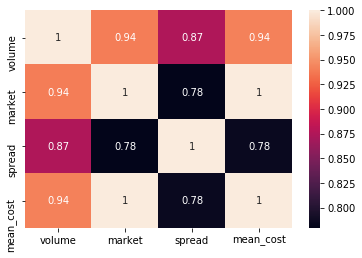

In [171]:
# Исследование корреляции показателей
#Bitcoin
import seaborn as sns
sns.heatmap(df_Bitcoin.corr(), annot = True)

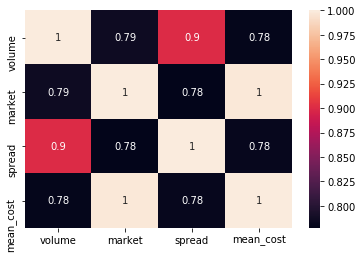

In [172]:
#XRP
sns.heatmap(df_XRP.corr(), annot = True)

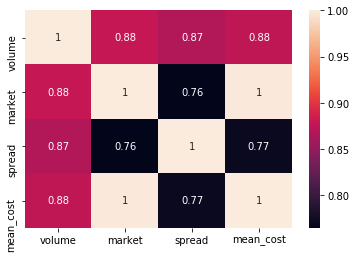

In [173]:
#Ethereum
sns.heatmap(df_Ethereum.corr(), annot = True)

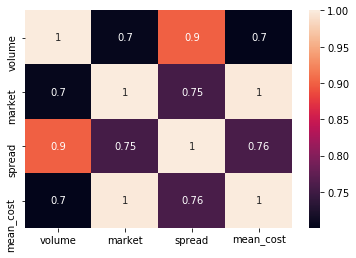

In [174]:
#Stellar
sns.heatmap(df_Stellar.corr(), annot = True)

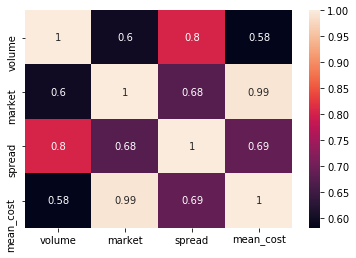

In [175]:
sns.heatmap(df_Bitcoin_Cash.corr(), annot = True)

In [176]:
""""Так как наблюдается высокая корреляция между всеми показателями, 
то оставим лишь один показатель, среднюю стоимость валюты в долларах США
И переименуем оставшийся столбец, добавим указание на наименование валюты"""
del df_Bitcoin['spread']
del df_Bitcoin['volume']
del df_Bitcoin['market']
df_Bitcoin.rename(columns={'mean_cost': 'Bitcoin'}, inplace=True)
del df_XRP['spread']
del df_XRP['volume']
del df_XRP['market']
df_XRP.rename(columns={'mean_cost': 'XRP'}, inplace=True)
del df_Ethereum['spread']
del df_Ethereum['volume']
del df_Ethereum['market']
df_Ethereum.rename(columns={'mean_cost': 'Ethereum'}, inplace=True)
del df_Stellar['spread']
del df_Stellar['volume']
del df_Stellar['market']
df_Stellar.rename(columns={'mean_cost': 'Stellar'}, inplace=True)
del df_Bitcoin_Cash['spread']
del df_Bitcoin_Cash['volume']
del df_Bitcoin_Cash['market']
df_Bitcoin_Cash.rename(columns={'mean_cost': 'Bitcoin_Cash'}, inplace=True)

D:\conda\conda2\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
#Собираем все нужные данные в одном фрейме
df = df_Bitcoin.merge(df_XRP, how = 'outer', left_on='date', right_on='date')
df = df.merge(df_Ethereum, how = 'outer', left_on='date', right_on='date')
df = df.merge(df_Stellar, how = 'outer', left_on='date', right_on='date')
df = df.merge(df_Bitcoin_Cash, how = 'outer', left_on='date', right_on='date')

In [178]:
df = df.fillna(0) # очистка пустых значений

In [179]:
fig6 = go.Figure()
fig6.add_trace(go.Scatter(x=df.date, y=df['Bitcoin'], name='Bitcoin'))
fig6.add_trace(go.Scatter(x=df.date, y=df['XRP'], name='XRP'))
fig6.add_trace(go.Scatter(x=df.date, y=df['Ethereum'], name='Ethereum'))
fig6.add_trace(go.Scatter(x=df.date, y=df['Stellar'], name='Stellar'))
fig6.add_trace(go.Scatter(x=df.date, y=df['Bitcoin_Cash'], name='Bitcoin_Cash'))
fig6.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Cryptocurrency",
                  xaxis_title="Date",
                  yaxis_title="price, USD",
                  margin=dict(l=0, r=0, t=30, b=0))
fig6.show()

In [180]:
push_frame("Cryptocurrency", fig6, "Cryptocurrency")

'https://dstack.ai/ZhivyhArs/Cryptocurrency'

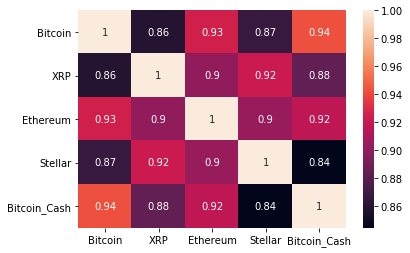

In [181]:
sns.heatmap(df.corr(), annot = True)